# 1. 线性逻辑回归决策边界

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [47]:
# 生成一个用于二分类的二维特征数据集
x, y = make_classification(
    n_samples=200,        # 样本数量
    n_features=2,         # 特征数量
    n_redundant=0,        # 冗余特征数量
    n_classes=2,          # 类别数
    n_clusters_per_class=1, # 每个类别的簇数
    random_state=1024     # 随机种子，保证结果可复现
)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233, stratify = y)

In [48]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [49]:
clf.score(x_train, y_train)

0.9357142857142857

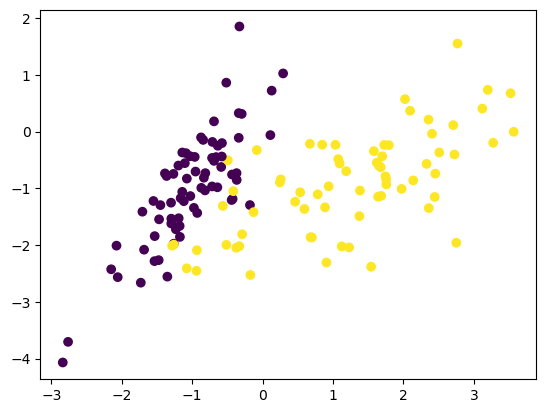

In [50]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

In [51]:
# 参数: w0+w1*x1+w2*x2=0, 这里就是 w1和w2
clf.coef_

array([[ 3.03386244, -1.81493954]])

In [52]:
# 截距: w0+w1*x1+w2*x2=0, 这里就是 w0
clf.intercept_

array([-1.13231228])

In [ ]:
x1 = np.linspace(-3.5,4,1000)
# w0+w1*x1+w2*x2=0 推导计算x2
x2 = (-clf.coef_[0][0] * x1 - clf.intercept_) / clf.coef_[0][1]

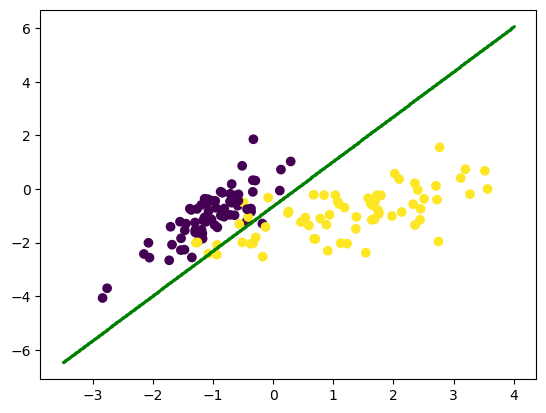

In [54]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.scatter(x1, x2,s=1, c='g')
plt.show()

# 2. 决策边界绘制函数

In [ ]:
# 自定义一个决策边界绘制函数,可以帮我们更好的绘制决策边界
def decision_boundary_plot(X, y, clf):
    # 1.计算图框的边界: 获取特征 X 的两个维度的最小值和最大值，并在边界上扩展 1 个单位
    axis_x1_min, axis_x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    axis_x2_min, axis_x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 2.生成很多随机点,然后预测对应的分类(用户后续填充背景色)
    # 使用 numpy 的 meshgrid 函数生成网格点，用于绘制决策边界
    # x1 和 x2 分别是两个维度的网格点
    x1, x2 = np.meshgrid(
        np.arange(axis_x1_min, axis_x1_max, 0.01),  # x1 的范围和步长
        np.arange(axis_x2_min, axis_x2_max, 0.01)   # x2 的范围和步长
    )
    # 使用分类器 clf 对网格点进行预测
    # np.c_ 将 x1 和 x2 的网格点组合成二维数组，作为输入
    z = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    # 将预测结果 z 的形状调整为与 x1 相同，以便用于绘图
    z = z.reshape(x1.shape)

    # 3.给第2步生成的点(实际是连续的二维标量场数据)上色
    # 导入 matplotlib 的颜色映射工具
    from matplotlib.colors import ListedColormap
    # 自定义颜色映射，用于区分不同类别
    custom_cmap = ListedColormap(['#F5B9EF', '#BBFFBB', '#F9F9CB'])
    # 使用 contourf 函数绘制决策边界的填充图
    # x1 和 x2 是网格点，z 是预测结果
    plt.contourf(x1, x2, z, cmap=custom_cmap)

    # 绘制原始数据点，X 是特征，y 是类别标签
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

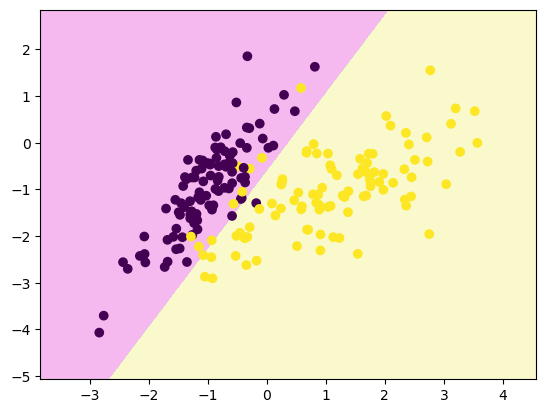

In [56]:
decision_boundary_plot(x, y ,clf)

# 3. 三分类的决策边界

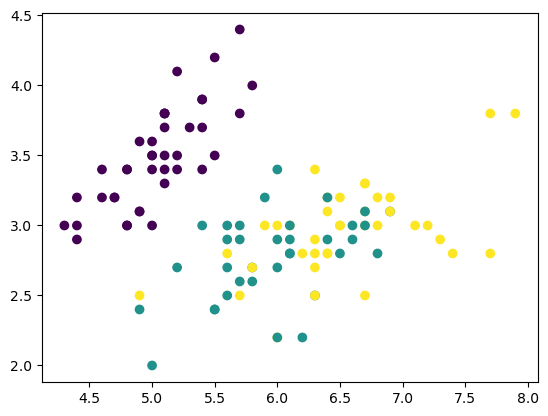

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,:2]  # 取前2个特征
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

In [58]:
clf.fit(x_train, y_train)

LogisticRegression()

In [59]:
clf.score(x_test, y_test)

0.7894736842105263

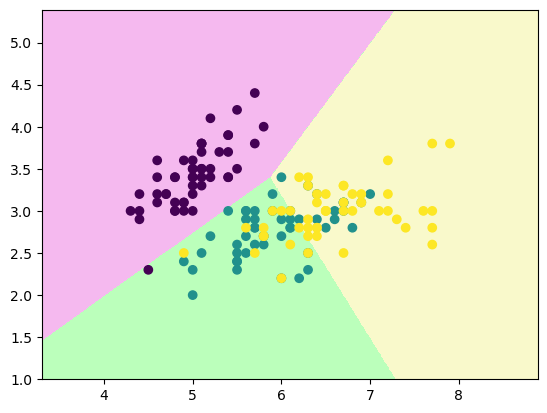

In [60]:
decision_boundary_plot(x, y, clf)

# 4. 多项式逻辑回归的决策边界

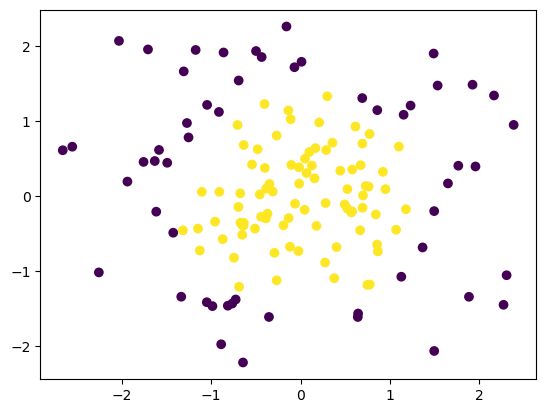

In [ ]:
np.random.seed(0)
x = np.random.normal(0, 1, size=(200, 2))
# 让数据分布成一个圆形 :圆内的是1，圆外的是0
y = np.array((x[:,0]**2+x[:,1]**2)<2, dtype='int')
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233, stratify = y)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [ ]:
# 把多个步骤组合起来,串联执行
# 逻辑回归要归一化的原因：逻辑回归对特征的尺度敏感，特征值差异过大时，模型收敛慢且参数难以解释。归一化可以加快收敛速度，提高模型性能和稳定性。
clf_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),  # StandardScaler使用的是“标准化”，即将特征缩放为均值为0、方差为1的分布（z-score标准化）
    ('log_reg', LogisticRegression())
])

In [65]:
clf_pipe.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

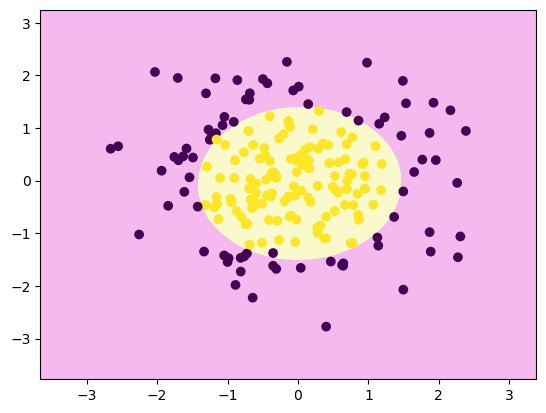

In [66]:
decision_boundary_plot(x, y, clf_pipe)